In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import load
import time

%matplotlib inline
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':100})

In [23]:
# load array
array_accuracy = []
array_f2 = []
array_sensitividade = []
array_time_total = []

resultados_svm = load('resultados_svm.npy', allow_pickle=True)
resultados_mlp = load('resultados_mlp.npy', allow_pickle=True)
resultados_rl = load('resultados_rl.npy', allow_pickle=True)
resultados_knn = load('resultados_knn.npy', allow_pickle=True)
resultados_mlm = load('resultados_mlm.npy', allow_pickle=True)

array_accuracy.append(resultados_svm.item().get('accuracy'))
array_accuracy.append(resultados_mlp.item().get('accuracy'))
array_accuracy.append(resultados_rl.item().get('accuracy'))
array_accuracy.append(resultados_knn.item().get('accuracy'))
array_accuracy.append(resultados_mlm.item().get('accuracy'))
array_accuracy = np.asarray(array_accuracy).T
#array_accuracy

array_f2.append(resultados_svm.item().get('f2'))
array_f2.append(resultados_mlp.item().get('f2'))
array_f2.append(resultados_rl.item().get('f2'))
array_f2.append(resultados_knn.item().get('f2'))
array_f2.append(resultados_mlm.item().get('f2'))
array_f2 = np.asarray(array_f2).T
#array_f2

array_sensitividade.append(resultados_svm.item().get('recall'))
array_sensitividade.append(resultados_mlp.item().get('recall'))
array_sensitividade.append(resultados_rl.item().get('recall'))
array_sensitividade.append(resultados_knn.item().get('recall'))
array_sensitividade.append(resultados_mlm.item().get('recall'))
array_sensitividade = np.asarray(array_sensitividade).T
#array_sensitividade

array_time_total.append(resultados_svm.item().get('time_total'))
array_time_total.append(resultados_mlp.item().get('time_total'))
array_time_total.append(resultados_rl.item().get('time_total'))
array_time_total.append(resultados_knn.item().get('time_total'))
array_time_total.append(resultados_mlm.item().get('time_total'))
array_time_total = np.asarray(array_time_total).T
#array_time_total

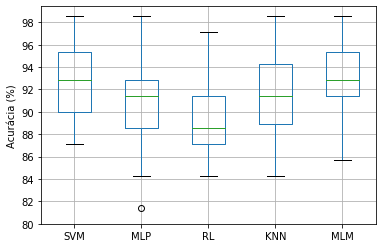

In [24]:
df_accuracy = pd.DataFrame(array_accuracy*100,columns=['SVM','MLP', 'RL', 'KNN', 'MLM'])
boxplot_accuracy = df_accuracy.boxplot(column=['SVM','MLP', 'RL', 'KNN', 'MLM'])
plt.yticks(np.arange(80, 100, 2.0))
plt.ylabel('Acurácia (%)')
plt.savefig('acuracia.pdf')

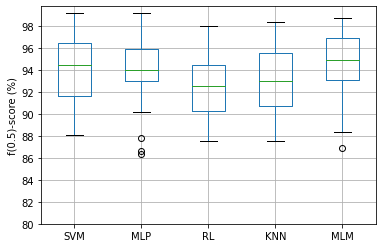

In [25]:
df_f2 = pd.DataFrame(array_f2*100,columns=['SVM','MLP', 'RL',  'KNN', 'MLM'])
boxplot_f2 = df_f2.boxplot(column=['SVM','MLP', 'RL', 'KNN', 'MLM'], grid = True)
plt.yticks(np.arange(80, 100, 2.0))
plt.ylabel('f(0.5)-score (%)')
plt.savefig('f05_score.pdf')

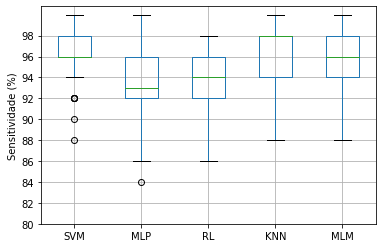

In [26]:
df_sen = pd.DataFrame(array_sensitividade*100,columns=['SVM','MLP', 'RL',  'KNN', 'MLM'])
boxplot_sen = df_sen.boxplot(column=['SVM','MLP', 'RL', 'KNN', 'MLM'], grid = True)
plt.yticks(np.arange(80, 100, 2.0))
plt.ylabel('Sensitividade (%)')
plt.savefig('sensitividade.pdf')

In [15]:
metricas = {
    'Acurácia': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('accuracy'), axis=0)*100, np.std(resultados_svm.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('accuracy'), axis=0)*100, np.std(resultados_mlp.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('accuracy'), axis=0)*100, np.std(resultados_rl.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('accuracy'), axis=0)*100, np.std(resultados_knn.item().get('accuracy'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('accuracy'), axis=0)*100, np.std(resultados_mlm.item().get('accuracy'), axis=0)*100)
        
    ],
    'Precisão': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('precision'), axis=0)*100, np.std(resultados_svm.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('precision'), axis=0)*100, np.std(resultados_mlp.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('precision'), axis=0)*100, np.std(resultados_rl.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('precision'), axis=0)*100, np.std(resultados_knn.item().get('precision'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('precision'), axis=0)*100, np.std(resultados_mlm.item().get('precision'), axis=0)*100)
    ],
    'Sensitividade': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('recall'), axis=0)*100, np.std(resultados_svm.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('recall'), axis=0)*100, np.std(resultados_mlp.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('recall'), axis=0)*100, np.std(resultados_rl.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('recall'), axis=0)*100, np.std(resultados_knn.item().get('recall'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('recall'), axis=0)*100, np.std(resultados_mlm.item().get('recall'), axis=0)*100)
        
    ],
    'Especificidade': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('specificity'), axis=0)*100, np.std(resultados_svm.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('specificity'), axis=0)*100, np.std(resultados_mlp.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('specificity'), axis=0)*100, np.std(resultados_rl.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('specificity'), axis=0)*100, np.std(resultados_knn.item().get('specificity'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('specificity'), axis=0)*100, np.std(resultados_mlm.item().get('specificity'), axis=0)*100)
        
    ],
    'fb-score': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('f2'), axis=0)*100, np.std(resultados_svm.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('f2'), axis=0)*100, np.std(resultados_mlp.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('f2'), axis=0)*100, np.std(resultados_rl.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('f2'), axis=0)*100, np.std(resultados_knn.item().get('f2'), axis=0)*100),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('f2'), axis=0)*100, np.std(resultados_mlm.item().get('f2'), axis=0)*100)
        
    ],
    'Time_Total (s)': [
        "%.2f $\pm$ %.2f" % (np.mean(resultados_svm.item().get('time_total'), axis=0), np.std(resultados_svm.item().get('time_total'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlp.item().get('time_total'), axis=0), np.std(resultados_mlp.item().get('time_total'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_rl.item().get('time_total'), axis=0), np.std(resultados_rl.item().get('time_total'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_knn.item().get('time_total'), axis=0), np.std(resultados_knn.item().get('time_total'), axis=0)),
        "%.2f $\pm$ %.2f" % (np.mean(resultados_mlm.item().get('time_total'), axis=0), np.std(resultados_mlm.item().get('time_total'), axis=0))
        
    ]
}
indices=['SVM', 'MLP', 'RL', 'KNN', 'MLM']
df = pd.DataFrame(data=metricas, index = indices)
df

,Acurácia,Precisão,Sensitividade,Especificidade,fb-score,Time_Total (s)
SVM,92.51 $\pm$ 3.08,93.46 $\pm$ 3.59,96.44 $\pm$ 2.75,82.70 $\pm$ 10.11,94.00 $\pm$ 2.85,0.63 $\pm$ 0.08
MLP,90.97 $\pm$ 3.26,94.15 $\pm$ 3.39,93.32 $\pm$ 3.70,85.10 $\pm$ 9.35,93.93 $\pm$ 2.67,8.75 $\pm$ 1.20
RL,89.54 $\pm$ 3.17,92.32 $\pm$ 3.19,93.24 $\pm$ 3.15,80.30 $\pm$ 8.80,92.47 $\pm$ 2.60,1.02 $\pm$ 0.12
KNN,91.51 $\pm$ 3.11,92.27 $\pm$ 3.68,96.40 $\pm$ 2.91,79.30 $\pm$ 10.58,93.02 $\pm$ 2.89,1.58 $\pm$ 0.18
MLM,92.77 $\pm$ 3.03,94.42 $\pm$ 3.30,95.68 $\pm$ 2.81,85.50 $\pm$ 9.18,94.63 $\pm$ 2.65,0.10 $\pm$ 0.03


In [16]:
#plt.boxplot(df_accuracy.T, labels=['SVM','MLP', 'RL', 'GBDT', 'KNN'], boxprops=dict(color='black'))
#plt.title('Desempenho dos Modelos');
#plt.xlabel('Algoritmo')
#plt.ylabel('Acurácia (%)')
#plt.savefig('acuracia.pdf')

In [17]:
#plt.boxplot(df_f2.T, labels=['SVM','MLP', 'RL', 'GBDT', 'KNN'], boxprops=dict(color='black'))
#plt.title('Desempenho dos Modelos');
#plt.xlabel('Algoritmo')
#plt.ylabel('f(0.5(-score (%)')
#plt.savefig('f05_score.pdf')

# Matriz de confusão

In [18]:
import os
import sys
sys.path.insert(0, os.path.abspath('../Util'))
from dados import ProcessarDados
procData = ProcessarDados("../dataset/bin_norm_10_features_m73_n4.csv", sep = ',')

# SVM

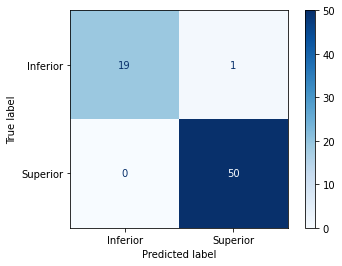

[[19  1]
 [ 0 50]]
Métricas:
	Acurácia: 98.57
	Precisão: 98.04
	Sensitividade: 100.00
	Especificidade: 95.00
	Fb-score: 98.43
Parametros:
{'C': 20, 'Gamma': 0.04, 'Kernel': 'rbf'}
	Time Total(s): 0.57


In [19]:
# acessando o melhor SVM
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter

index_best_svm = np.argmax(resultados_svm.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout2(0.2, index_best_svm)

best_svm_params = resultados_svm.item().get('params')[index_best_svm]
SVM = svm.SVC(random_state = index_best_svm, C = best_svm_params['C'], gamma = best_svm_params['Gamma'], kernel = best_svm_params['Kernel'])
SVM.fit(X_train, y_train)

#testando o modelo
y_pred = SVM.predict(X_test)
plot_confusion_matrix(SVM, X_test, y_test, display_labels = ['Inferior', 'Superior'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_svm.item().get('params')[index_best_svm])
print("\tTime Total(s): %.2f" % (resultados_svm.item().get('time_total')[index_best_svm]))

# MLP

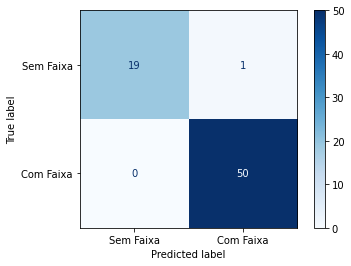

[[19  1]
 [ 0 50]]
Métricas:
	Acurácia: 98.57
	Precisão: 98.04
	Sensitividade: 100.00
	Especificidade: 95.00
	Fb-score: 98.43
Parametros:
{'Activation': 'relu', 'Alpha': 0.1, 'Solver': 'lbfgs', 'hidden_layer_sizes': 150}
	Time Total(s): 8.58


In [21]:
# acessando o melhor MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter

index_best_mlp = np.argmax(resultados_mlp.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout2(0.2, index_best_mlp)

best_mlp_params = resultados_mlp.item().get('params')[index_best_mlp]
MLP = MLPClassifier(random_state = index_best_mlp, max_iter = 1000, activation = best_mlp_params['Activation'], alpha = best_mlp_params['Alpha'], solver = best_mlp_params['Solver'], hidden_layer_sizes = best_mlp_params['hidden_layer_sizes'])
MLP.fit(X_train, y_train)

#testando o modelo
y_pred = MLP.predict(X_test)
plot_confusion_matrix(MLP, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_mlp.item().get('params')[index_best_mlp])
print("\tTime Total(s): %.2f" % (resultados_mlp.item().get('time_total')[index_best_mlp]))

# RL - Manual

[[19  1]
 [ 2 48]]
Métricas:
	Acurácia: 95.71
	Precisão: 97.96
	Sensitividade: 96.00
	Especificidade: 95.00
	Fb-score: 97.56
Parametros:
{'alpha': 1.0}
	Time Total(s): 1.05


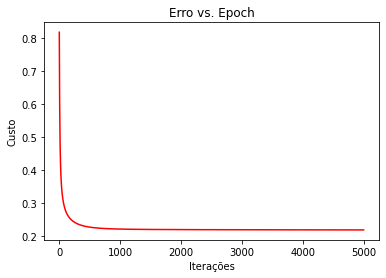

In [23]:
#IMPORTAR BIBLIOTECAS UTILIZADAS

import numpy as np
import pandas as pd
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#DEFINIR FUNCAO LOGISTICA (SIGMOID) PARA PREVER A PROBABILIDADE 
def sigmoid(w,X):
    z = np.dot(X,w)
    return 1 / (1 + np.exp(-z))

#DEFINIR FUNCAO PARA CLASSIFICAR
def classificar(y, limiar=0.5):
    return (y > limiar)*1

#DEFINIR FUNCAO CUSTO UTILIZANDO ENTROPIA CRUZADA
def entropiaCruzada(previsto,y):
    return (-y * np.log(previsto) - (1 - y) * np.log(1 - previsto)).mean()

#DEFINIR FUNCAO GRADIENTE DESCENDENTE PARA ATUALIZAR OS PARAMÊTROS w
def gradienteDescendente(w, X, y, alpha):
    previsto = sigmoid(w,X)
    erro = previsto - y
    gradiente = np.dot(X.T, erro) / len(X)
    w -= alpha*gradiente

index_best_rl = np.argmax(resultados_rl.item().get('accuracy'))

X_treino, X_teste, y_treino, y_teste = procData.holdout2(0.2, index_best_rl)

best_rl_params = resultados_rl.item().get('params')[index_best_rl]

#ALTERANDO DIMENSÃO DE Y PARA D=1
#y_treino = y_treino.reshape(480,)
#y_teste = y_teste.reshape(120,)

#ADICIONAR ATRIBUTOS IGUAIS A 1 EM X0
X_treino = np.c_[np.ones(X_treino.shape[0]), X_treino]
X_teste = np.c_[np.ones(X_teste.shape[0]), X_teste]

#INICIALIZAR W (THETA) DE FORMA RANDOMICA e OTIMIZAR PARÂMETROS 
w = np.random.rand(X_treino.shape[1])
epoch = 5000
custo = np.zeros(epoch)
for i in range(epoch):
    custo[i] = entropiaCruzada(sigmoid(w,X_treino),y_treino)
    gradienteDescendente(w,X_treino,y_treino,0.1)
    

fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), custo, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')

#testando o modelo
y_pred = classificar(sigmoid(w, X_teste))
cm  = confusion_matrix(y_teste, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_teste, y_pred)
precision = metrics.precision_score(y_teste, y_pred)
recall = metrics.recall_score(y_teste, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_rl.item().get('params')[index_best_rl])
print("\tTime Total(s): %.2f" % (resultados_rl.item().get('time_total')[index_best_rl]))


# RL - LIB

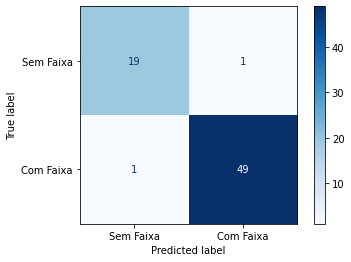

[[19  1]
 [ 1 49]]
Métricas:
	Acurácia: 97.14
	Precisão: 98.00
	Sensitividade: 98.00
	Especificidade: 95.00
	Fb-score: 98.00
Parametros:
{'alpha': 1.0}
	Time Total(s): 1.05


In [24]:
# acessando o melhor RL
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter
#!python -m pip install --user scikit-mlm

from skmlm import NN_MLM, MLMC

index_best_rl = np.argmax(resultados_rl.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout2(0.2, index_best_rl)

best_rl_params = resultados_rl.item().get('params')[index_best_rl]
RL = LogisticRegression(random_state = index_best_rl, tol = best_rl_params['alpha'])
RL.fit(X_train, y_train)

#testando o modelo
y_pred = RL.predict(X_test)
plot_confusion_matrix(RL, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_rl.item().get('params')[index_best_rl])
print("\tTime Total(s): %.2f" % (resultados_rl.item().get('time_total')[index_best_rl]))


# KNN

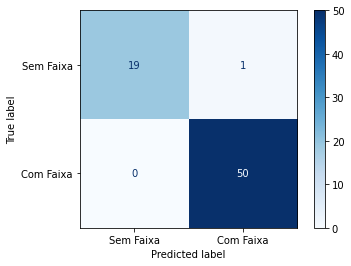

[[19  1]
 [ 0 50]]
Métricas:
	Acurácia: 98.57
	Precisão: 98.04
	Sensitividade: 100.00
	Especificidade: 95.00
	Fb-score: 98.43
Parametros:
{'n_neighbors': 18, 'p': 2}
	Time Total(s): 1.65


In [25]:
# acessando o melhor KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter

index_best_knn = np.argmax(resultados_knn.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout2(0.2, index_best_knn)

best_knn_params = resultados_knn.item().get('params')[index_best_knn]
KNN = KNeighborsClassifier(n_neighbors=best_knn_params['n_neighbors'], p=best_knn_params['p'], metric='minkowski')
KNN.fit(X_train, y_train)

#testando o modelo
y_pred = KNN.predict(X_test)
plot_confusion_matrix(KNN, X_test, y_test, display_labels = ['Sem Faixa', 'Com Faixa'], cmap ='Blues')
plt.show()

cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_knn.item().get('params')[index_best_knn])
print("\tTime Total(s): %.2f" % (resultados_knn.item().get('time_total')[index_best_knn]))

# MLM

In [26]:
# acessando o melhor MLM
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import numpy as np
from collections import Counter
#!python -m pip install --user scikit-mlm

from skmlm import NN_MLM, MLMC

index_best_mlm = np.argmax(resultados_mlm.item().get('accuracy'))

X_train, X_test, y_train, y_test = procData.holdout2(0.2, index_best_mlm)

best_mlm_params = resultados_mlm.item().get('params')[index_best_mlm]
MLM = NN_MLM(rp_number = best_mlm_params['rp_number'], random_state=index_best_mlm)

start_time_total = time.clock()
MLM.fit(X_train, y_train)

#testando o modelo
y_pred = MLM.predict(X_test)
time_total = time.clock() - start_time_total
cm  = confusion_matrix(y_test, y_pred)
print(cm)

# calculado as metricas
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
# f2-score
# Fbeta = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
beta = 0.5
f2_score = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)

print("Métricas:")
print("\tAcurácia: %.2f" % (accuracy*100))
print("\tPrecisão: %.2f" % (precision*100))
print("\tSensitividade: %.2f" % (recall*100))
print("\tEspecificidade: %.2f" % (specificity*100))
print("\tFb-score: %.2f" % (f2_score*100))
print("Parametros:")
print(resultados_mlm.item().get('params')[index_best_mlm])
print("\tTime Total(s): %.2f" % (resultados_mlm.item().get('time_total')[index_best_mlm]))

[[19  1]
 [ 0 50]]
Métricas:
	Acurácia: 98.57
	Precisão: 98.04
	Sensitividade: 100.00
	Especificidade: 95.00
	Fb-score: 98.43
Parametros:
{'rp_number': 196}
	Time Total(s): 0.08
